In [607]:
# Hi guys, in this section Im gonna make project on ml using using the 
# XPREP8.csv file to classify the worked column and to make regression in percentage of returns 
# for that to happen i imported the following modules ,here i will assist u throughout my code to say where to import which module and why i did them
# and here i need to share few words abt the project 
# these are my own codes and i didnt copied from any online or offline resourses or else copied from others.......
 

In [641]:
# plz import these modules ,,before that install tensorflow,keras using pip and xgboost in cmd promt in anaconda ..... 

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [642]:
# here i used delimeter to convert strings to original float variables 
dataset=loadtxt('XPREP8.csv', delimiter=',')
x=dataset[:,0:9]
y=dataset[:,9]
x_train , x_test, y_train, y_test = train_test_split( x ,y, test_size= .33,random_state=50)

In [643]:
# this is the major part of ANN which i created on myself using some concepts of keras 

model=Sequential()
model.add(Dense(12,input_dim=9,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(x,y,epochs=300,batch_size=6)
_,accuracy=model.evaluate(x,y)
print("accuracy of self created ANN =:")
print ((accuracy*100))

Epoch 1/300
155/155 [==============================] - 4s 2ms/step - loss: 374243.4062 - accuracy: 0.4472
Epoch 2/300
155/155 [==============================] - 0s 2ms/step - loss: 1839.8495 - accuracy: 0.5162
Epoch 3/300
155/155 [==============================] - 0s 2ms/step - loss: 1688.1538 - accuracy: 0.5172
Epoch 4/300
155/155 [==============================] - 0s 2ms/step - loss: 2799.1326 - accuracy: 0.5409
Epoch 5/300
155/155 [==============================] - 0s 3ms/step - loss: 2028.4331 - accuracy: 0.4978
Epoch 6/300
155/155 [==============================] - 0s 2ms/step - loss: 2564.5049 - accuracy: 0.5129
Epoch 7/300
155/155 [==============================] - 0s 2ms/step - loss: 2218.8010 - accuracy: 0.5409
Epoch 8/300
155/155 [==============================] - 0s 2ms/step - loss: 3368.4941 - accuracy: 0.5420
Epoch 9/300
155/155 [==============================] - 0s 2ms/step - loss: 2293.2007 - accuracy: 0.5280
Epoch 10/300
155/155 [==============================] - 0s 2ms

In [644]:
# these classifier comes from naive bayers theorem
Bern = BernoulliNB(binarize = True)
Bern.fit(x_train,y_train)
y_expect=y_test
y_predict=Bern.predict(x_test)
print("ACCURACY OF BERNOULLI= " ,accuracy_score(y_expect,y_predict)*100)

ACCURACY OF BERNOULLI=  61.88925081433225


In [646]:
#Random forest regression
%timeit
from sklearn.ensemble import RandomForestClassifier
randf=RandomForestClassifier()
randf.fit(x_train,y_train)
y_predict=randf.predict(x_test)
print("ACCURACY OF RANDOM_FOREST= " ,accuracy_score(y_expect,y_predict)*100)

ACCURACY OF RANDOM_FOREST=  79.47882736156352


In [647]:
# here multinomial will take only positive values so i normalised them i mean x and y
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(x_train)
x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)
multi = MultinomialNB()
multi.fit(x_train_norm,y_train)
y_expect=y_test
y_predict=multi.predict(x_test_norm)
print("ACCURACY OF MULTINODAL= " ,accuracy_score(y_expect,y_predict)*100)


ACCURACY OF MULTINODAL=  58.306188925081436


In [649]:
# adaboost isone of the fine tuning algo for classification and regression 
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)*100

71.33550488599349

In [650]:
# gradient boosting classification
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)*100


75.8957654723127

In [652]:
# extreme gradient boosting algorithm
xxgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xxgb.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)*100


D:\8e\anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


75.8957654723127

In [654]:
# regression of following data starts here
data=pd.read_csv('XPREP8.csv')
x=data.drop(['percentage_returns given','Volume'],axis=1).values
y=data['percentage_returns given'].values

In [655]:
# to display the data
data.head()


,##Close,Volume,EMA5,EMA13,EMA26,MACD,SIGNAL,RSI,ROC,worked?,percentage_returns given
0,1136.95,3594297,1126.883592,1124.903001,1113.181837,12.016158,17.498908,58.490715,2.635974,1,3.135582
1,1147.40,6885679,1133.722395,1128.116858,1115.716515,12.897172,16.578561,61.178123,3.457914,0,2.196270
2,1160.75,8929987,1142.731597,1132.778736,1119.052329,14.505406,16.163930,64.353228,2.336346,0,1.020892
3,1155.65,4729914,1147.037731,1136.046059,1121.763268,15.193278,15.969800,62.258378,4.192400,0,1.466707
4,1138.60,2541804,1144.225154,1136.410908,1123.010433,14.198952,15.615630,55.727237,3.246282,0,2.986123


In [656]:
# test train data split
x_train , x_test, y_train, y_test = train_test_split( x ,y, test_size= .30,random_state=10)

In [657]:
# linear regression
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred= lr.predict(x_test)

In [658]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

54.75676514263852

Text(0.5, 1.0, 'actual vs predicted')

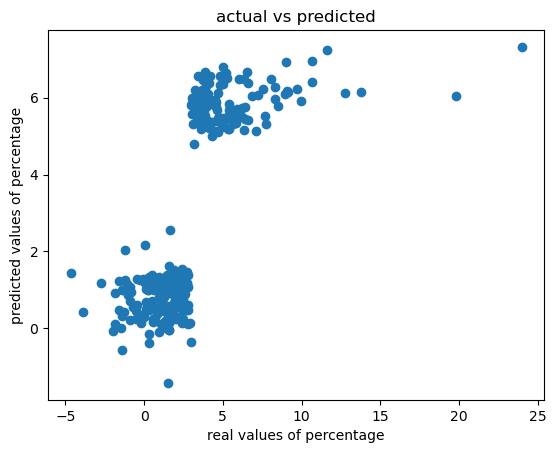

In [660]:
# to plot graph btw actual and predicted data
plt.scatter(y_test,y_pred)
plt.xlabel('real values of percentage')
plt.ylabel('predicted values of percentage')
plt.title('actual vs predicted')

In [661]:
# to display the data of first 20
predicted_dataframe=pd.DataFrame({'actual value':y_test,'predicted value':y_pred,'Difference':y_test-y_pred})
predicted_dataframe[0:20]

,actual value,predicted value,Difference
0,8.294233,5.974737,2.319497
1,1.095044,0.097118,0.997927
2,-0.432607,1.282078,-1.714685
3,9.006963,6.922497,2.084467
4,0.918037,1.322680,-0.404643
5,-4.668787,1.442760,-6.111547
6,3.763292,6.470855,-2.707563
7,3.044815,5.980375,-2.935560
8,1.493188,0.455527,1.037660
9,3.546914,5.314506,-1.767592


In [662]:
# random forest regression
from sklearn.ensemble import RandomForestRegressor
%timeit
rfr = RandomForestRegressor(n_estimators = 50, oob_score = 'TRUE',n_jobs = 1,random_state =10)
rfr.fit(x_train, y_train) 
y_pred=rfr.predict(x_test)
r2_score(y_test,y_pred)*100

74.43207241860976

Text(0.5, 1.0, 'actual vs predicted')

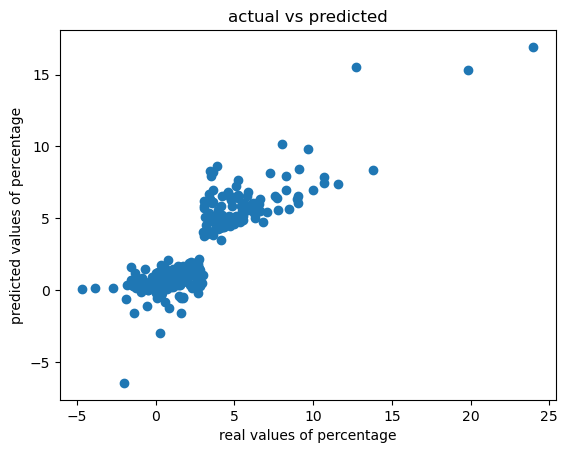

In [664]:
plt.scatter(y_test,y_pred)
plt.xlabel('real values of percentage')
plt.ylabel('predicted values of percentage')
plt.title('actual vs predicted')

In [665]:
predicted_dataframe=pd.DataFrame({'actual value':y_test,'predicted value':y_pred,'Difference':y_test-y_pred})
predicted_dataframe[0:20]



,actual value,predicted value,Difference
0,8.294233,7.938784,0.355449
1,1.095044,0.210890,0.884154
2,-0.432607,0.557519,-0.990126
3,9.006963,6.537274,2.469689
4,0.918037,0.699765,0.218272
5,-4.668787,0.069004,-4.737791
6,3.763292,4.942830,-1.179537
7,3.044815,5.828328,-2.783514
8,1.493188,1.616952,-0.123765
9,3.546914,4.783128,-1.236213


In [666]:
# decision tree regression
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(x_train, y_train)
y_pred=dtr.predict(x_test)
r2_score(y_test,y_pred)*100

69.565440826282

In [667]:
# giving a try for normalisation
norm = MinMaxScaler().fit(x_train)
x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)
rfr = RandomForestRegressor(n_estimators = 50, oob_score = 'TRUE',n_jobs = 1,random_state =10)
rfr.fit(x_train_norm, y_train) 
y_pred=rfr.predict(x_test_norm)
r2_score(y_test,y_pred)*100

74.42943394018135

In [669]:
# to check the relation of data and i found that droping volumes from data not gonna to be a big deal as volume gives already contribution in the momentum indicator of rsi and roc 
matrix = data.corr()
print(matrix)

                           ##Close    Volume      EMA5     EMA13     EMA26  \
##Close                   1.000000 -0.231402  0.997315  0.991018  0.980832   
Volume                   -0.231402  1.000000 -0.232511 -0.234827 -0.236133   
EMA5                      0.997315 -0.232511  1.000000  0.997130  0.988700   
EMA13                     0.991018 -0.234827  0.997130  1.000000  0.996595   
EMA26                     0.980832 -0.236133  0.988700  0.996595  1.000000   
MACD                      0.425139 -0.058310  0.406172  0.348783  0.270358   
SIGNAL                    0.448807 -0.071644  0.442453  0.401421  0.327661   
RSI                       0.404217 -0.081884  0.367114  0.311033  0.248416   
ROC                       0.172575  0.007002  0.123107  0.058316  0.012501   
worked?                  -0.026112  0.130862 -0.023981 -0.021879 -0.018092   
percentage_returns given -0.114672  0.127653 -0.111575 -0.107684 -0.105489   

                              MACD    SIGNAL       RSI       RO

Text(0.5, 1.0, 'actual vs predicted')

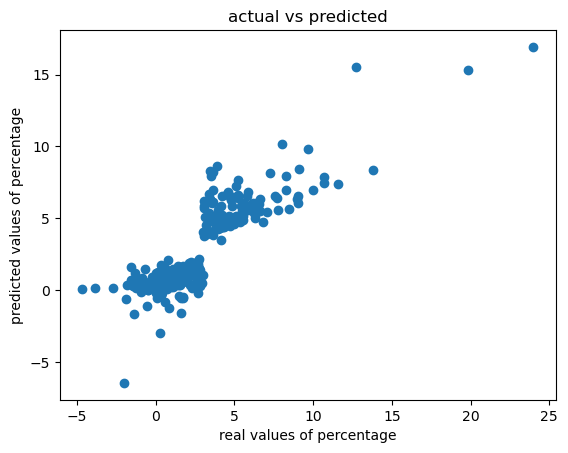

In [670]:
plt.scatter(y_test,y_pred)
plt.xlabel('real values of percentage')
plt.ylabel('predicted values of percentage')
plt.title('actual vs predicted')

In [671]:
predicted_dataframe=pd.DataFrame({'actual value':y_test,'predicted value':y_pred,'Difference':y_test-y_pred})
predicted_dataframe[0:20]

,actual value,predicted value,Difference
0,8.294233,7.938784,0.355449
1,1.095044,0.210890,0.884154
2,-0.432607,0.557519,-0.990126
3,9.006963,6.537274,2.469689
4,0.918037,0.699765,0.218272
5,-4.668787,0.069004,-4.737791
6,3.763292,4.942830,-1.179537
7,3.044815,5.828328,-2.783514
8,1.493188,1.616952,-0.123765
9,3.546914,4.783128,-1.236213


In [672]:
# using xgboost
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 200, seed = 100)
xgb_r.fit(x_train,y_train)
pred = xgb_r.predict(x_test)
metrics.r2_score(y_test,pred)*100

[23:41:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


80.36413609607844

In [673]:
predicted_dataframe=pd.DataFrame({'actual value':y_test,'predicted value':pred,'Difference':y_test-pred})
predicted_dataframe[0:20]


,actual value,predicted value,Difference
0,8.294233,8.693191,-0.398957
1,1.095044,0.286828,0.808217
2,-0.432607,0.114974,-0.547581
3,9.006963,8.399709,0.607255
4,0.918037,1.219227,-0.301190
5,-4.668787,-1.527079,-3.141708
6,3.763292,3.802324,-0.039031
7,3.044815,5.439680,-2.394866
8,1.493188,1.221349,0.271839
9,3.546914,4.906406,-1.359492


Text(0.5, 1.0, 'actual vs predicted')

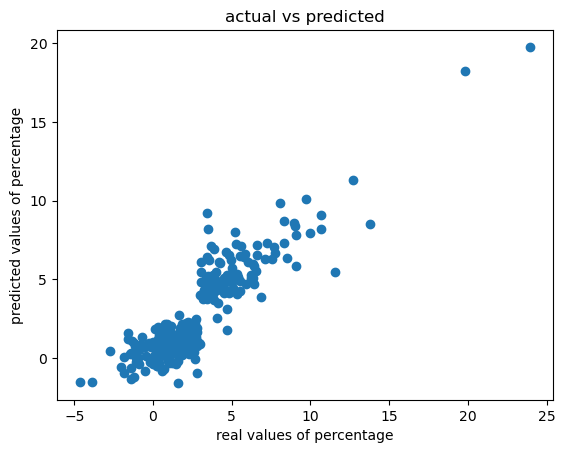

In [676]:
plt.scatter(y_test,pred)
plt.xlabel('real values of percentage')
plt.ylabel('predicted values of percentage')
plt.title('actual vs predicted')

In [677]:
# ada boost regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 50, oob_score = 'TRUE',n_jobs = 1,random_state =10)

RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=rfr ,learning_rate=1)
 
print(RegModel)
AB=RegModel.fit(x_train,y_train)
prediction=AB.predict(x_test)
metrics.r2_score(y_test,prediction)*100

AdaBoostRegressor(base_estimator=RandomForestRegressor(n_estimators=50,
                                                       n_jobs=1,
                                                       oob_score='TRUE',
                                                       random_state=10),
                  learning_rate=1, n_estimators=100)


69.07493116247487

In [678]:
# for further query plz free to contact me ,my number(call and whatsapp) 6369483490 
# 125158079  
# name D.JAGADESHVAR PRASANNA
# cse iot and automation



# classification random forest best =80percentage,bernouli 62,multinomial 58,gradient boosting=75,xboost 75,adaboost 72,
# regression best xboost =80 percentage,linear regression54 ,randomforest 74,adaboost=69,